In [45]:
#%%prun -s cumulative
import ROOT
import array
import datetime
import sys
import numpy as np
from IPython.display import Image as Plot
def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

#Good res
g_xres = 1000
g_yres = 500
        
sys.path.insert(0, '/Users/sdporzio/HighVoltageTask')
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset);
ROOT.gStyle.SetPalette(ROOT.kRainBow);
ROOT.gStyle.SetOptStat(0)
outDir = 'Plots/HvAnalysis/'
extension = '.png'

startTime = ROOT.TDatime(2015,10,01,00,00,00).Convert()
weekTime = 604800
nWeeks = 4*4
nDays = nWeeks*7
daysPerBin = 7
endTime = startTime + weekTime*nWeeks
timeDivisions = int(nWeeks/4) + 4*100

nFiles = 1
mainDisplay = 0
fBL = [0]*nFiles
fBL[0] = open("Data_Events/hvEvents_0.1V.dat","r")
# fBL[1] = open("Data_Events/hvEvents_0.08V.dat","r")
# fBL[2] = open("Data_Events/hvEvents_0.06V.dat","r")

for i in range(nFiles):
    fBL[i].readline()

t = [0]*nFiles
time = [0]*nFiles
DTblipType = [0]*nFiles
PVblipType = [0]*nFiles
shortBaselineStatus = [0]*nFiles
longBaselineStatus = [0]*nFiles
peakRatio = [0]*nFiles
peakob = [0]*nFiles
duration = [0]*nFiles
peakMax = [0]*nFiles
peakMin = [0]*nFiles
durMax = [0]*nFiles
durMin = [0]*nFiles

for i in range(nFiles):
    time[i] = array.array("d",[])
    DTblipType[i] = []
    PVblipType[i] = []
    shortBaselineStatus[i] = []
    longBaselineStatus[i] = []
    peakRatio[i] = array.array("d",[])
    peakob[i] = array.array("d",[])
    duration[i] = array.array("d",[])

for i in range(nFiles):   
    for line in fBL[i]:
        if not line.startswith("#"):
            x = line.split()
            time[i].append(float(x[0]))
            DTblipType[i].append(x[1])
            PVblipType[i].append(x[2])
            shortBaselineStatus[i].append(x[3])
            longBaselineStatus[i].append(x[4])
            peakRatio[i].append(float(x[5]))
            peakob[i].append(float(x[6]))
            duration[i].append(float(x[7]))
            t[i]+=1

    peakMax[i] = peakob[i][0]
    peakMin[i] = peakob[i][0]
    durMax[i] = duration[i][0]
    durMin[i] = duration[i][0]
    for j in range(t[i]):
        if peakob[i][j] > peakMax[i]:
            peakMax[i] = peakob[i][j]
        if peakob[i][j] < peakMin[i]:
            peakMin[i] = peakob[i][j]
        if duration[i][j] > durMax[i]:
            durMax[i] = duration[i][j]
        if duration[i][j] < durMin[i]:
            durMin[i] = duration[i][j]

In [47]:
plotName = 'hAllVsTime'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH2D('h1',"Type of events vs. Time",int(nDays/daysPerBin),startTime,endTime,3,0,3)
h1.GetXaxis().SetTimeDisplay(1)
# h1.GetXaxis().SetTimeOffset(0,"UCT")
h1.GetYaxis().SetNdivisions(3,1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h1.GetYaxis().SetBinLabel(3,"Blip")
h1.GetYaxis().SetBinLabel(2,"BaselineShift")
h1.GetYaxis().SetBinLabel(1,"NotDefinite")

for i in range(t[mainDisplay]):
    if DTblipType[mainDisplay][i] == "Blip" and PVblipType[mainDisplay][i] == "Blip":
        bType = 2
    elif DTblipType[mainDisplay][i] == "BaselineShift" and PVblipType[mainDisplay][i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    h1.Fill(int(time[mainDisplay][i]),bType)
    
h1.Draw("COLZ")
h1.Draw("SAME TEXT")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
Plot(outDir+plotName+extension)

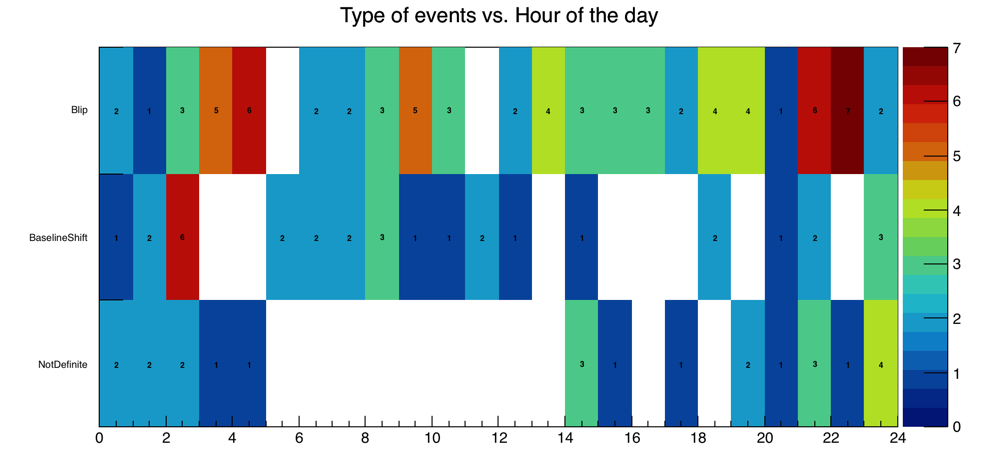

In [36]:
plotName = 'hAllHour'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH2D('h1',"Type of events vs. Hour of the day",24,0,24,3,0,3)
h1.GetYaxis().SetBinLabel(3,"Blip")
h1.GetYaxis().SetBinLabel(2,"BaselineShift")
h1.GetYaxis().SetBinLabel(1,"NotDefinite")

for i in range(t[mainDisplay]):
    if DTblipType[mainDisplay][i] == "Blip" and PVblipType[mainDisplay][i] == "Blip":
        bType = 2
    elif DTblipType[mainDisplay][i] == "BaselineShift" and PVblipType[mainDisplay][i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    hour = ROOT.TDatime(int(time[mainDisplay][i])).GetHour()
    h1.Fill(hour,bType)
    
h1.Draw("COLZ")
h1.Draw("SAME TEXT")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
Plot(outDir+plotName+extension)

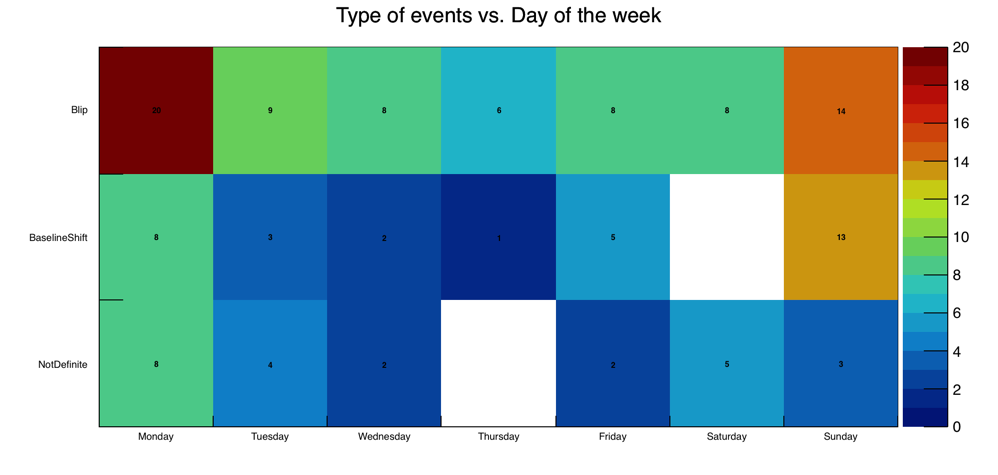

In [37]:
plotName = 'hAllDayWeek'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH2D('h1',"Type of events vs. Day of the week",7,1,8,3,0,3)
h1.GetYaxis().SetBinLabel(3,"Blip")
h1.GetYaxis().SetBinLabel(2,"BaselineShift")
h1.GetYaxis().SetBinLabel(1,"NotDefinite")
h1.GetXaxis().SetBinLabel(1,"Monday")
h1.GetXaxis().SetBinLabel(2,"Tuesday")
h1.GetXaxis().SetBinLabel(3,"Wednesday")
h1.GetXaxis().SetBinLabel(4,"Thursday")
h1.GetXaxis().SetBinLabel(5,"Friday")
h1.GetXaxis().SetBinLabel(6,"Saturday")
h1.GetXaxis().SetBinLabel(7,"Sunday")

for i in range(t[mainDisplay]):
    if DTblipType[mainDisplay][i] == "Blip" and PVblipType[mainDisplay][i] == "Blip":
        bType = 2
    elif DTblipType[mainDisplay][i] == "BaselineShift" and PVblipType[mainDisplay][i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    dayWeek = ROOT.TDatime(int(time[mainDisplay][i])).GetDayOfWeek()
    h1.Fill(dayWeek,bType)
    
h1.Draw("COLZ")
h1.Draw("SAME TEXT")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
Plot(outDir+plotName+extension)

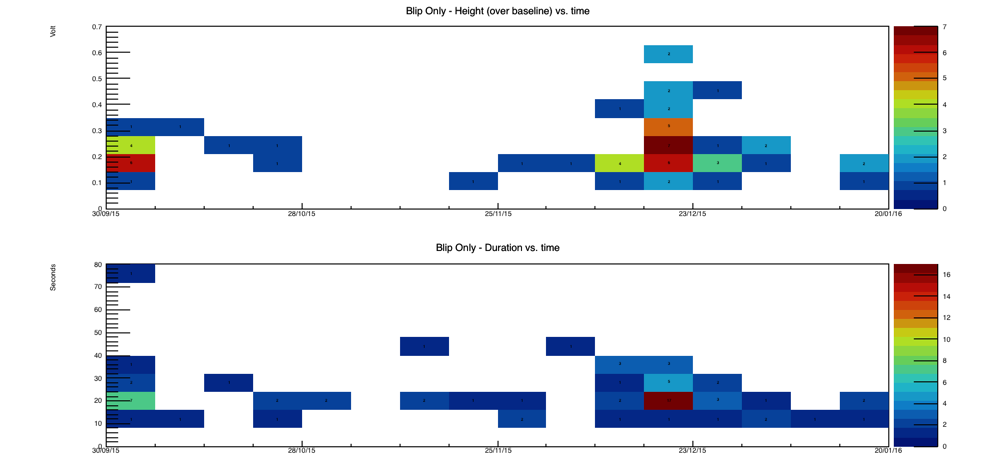

In [38]:
plotName = 'hHeightAndDurationVsTime'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH2D("h1","Blip Only - Height (over baseline) vs. time",int(nDays/daysPerBin),startTime,endTime,10,0,0.7)
h2 = ROOT.TH2D("h2","Blip Only - Duration vs. time",int(nDays/daysPerBin),startTime,endTime,10,0,80)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h1.GetYaxis().SetTitle("Volt")
h2.GetXaxis().SetTimeDisplay(1)
h2.GetXaxis().SetNdivisions(timeDivisions,0)
h2.GetYaxis().SetTitle("Seconds")

for i in range(t[mainDisplay]):
    if DTblipType[mainDisplay][i] == "Blip" and PVblipType[mainDisplay][i] == "Blip":
        bType = 2
    elif DTblipType[mainDisplay][i] == "BaselineShift" and PVblipType[mainDisplay][i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    if bType == 2:
        h1.Fill(int(time[mainDisplay][i]),peakob[mainDisplay][i])
        h2.Fill(int(time[mainDisplay][i]),duration[mainDisplay][i])
    
c1.Divide(1,2)
c1.cd(1)
h1.Draw("COLZ")
h1.Draw("SAME TEXT")
c1.cd(2)
h2.Draw("COLZ")
h2.Draw("SAME TEXT")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
destruct(h2)
Plot(outDir+plotName+extension)

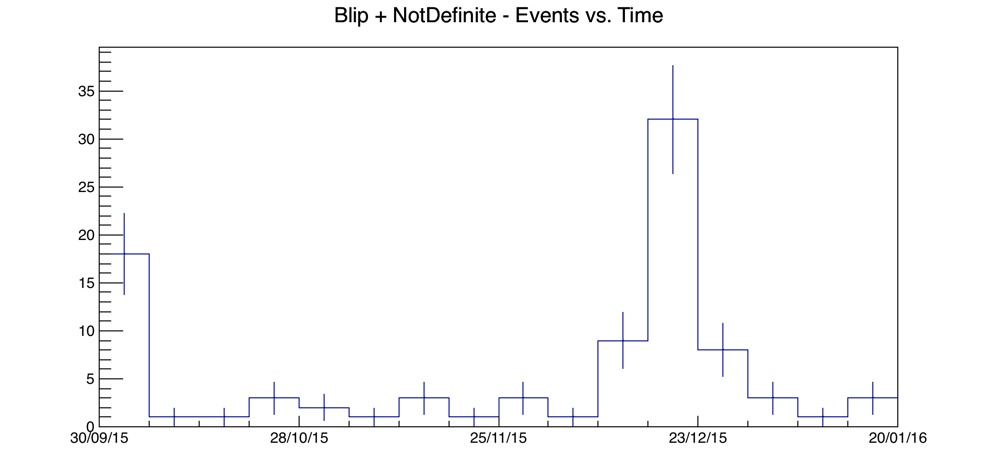

In [39]:
plotName = 'hBlipNumber'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH1D("h1","Blip + NotDefinite - Events vs. Time",int(nDays/daysPerBin),startTime,endTime)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)

for i in range(t[mainDisplay]):
    if DTblipType[mainDisplay][i] == "Blip" and PVblipType[mainDisplay][i] == "Blip":
        bType = 2
    elif DTblipType[mainDisplay][i] == "BaselineShift" and PVblipType[mainDisplay][i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    if bType == 2 or bType == 0:
        h1.Fill(int(time[mainDisplay][i]))

h1.Draw("EH")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
destruct(h2)
Plot(outDir+plotName+extension)

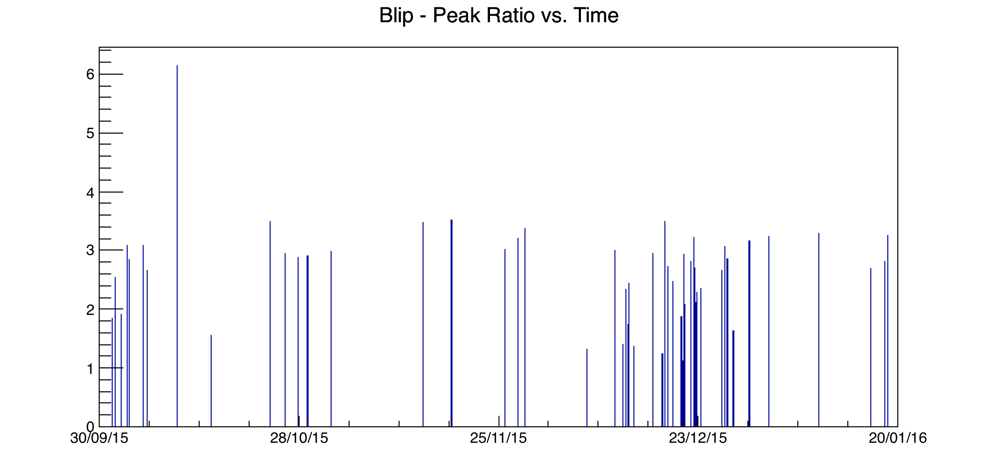

In [44]:
plotName = 'hPeakRatioVsTime'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH1D("h1","Blip - Peak Ratio vs. Time",int(nDays/daysPerBin)*500,startTime,endTime)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)

for i in range(t[mainDisplay]):
    if DTblipType[mainDisplay][i] == "Blip" and PVblipType[mainDisplay][i] == "Blip":
        bType = 2
    elif DTblipType[mainDisplay][i] == "BaselineShift" and PVblipType[mainDisplay][i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    if bType == 2:
        h1.SetBinContent(h1.FindBin(time[mainDisplay][i]),peakRatio[mainDisplay][i])

h1.Draw("H")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
Plot(outDir+plotName+extension)

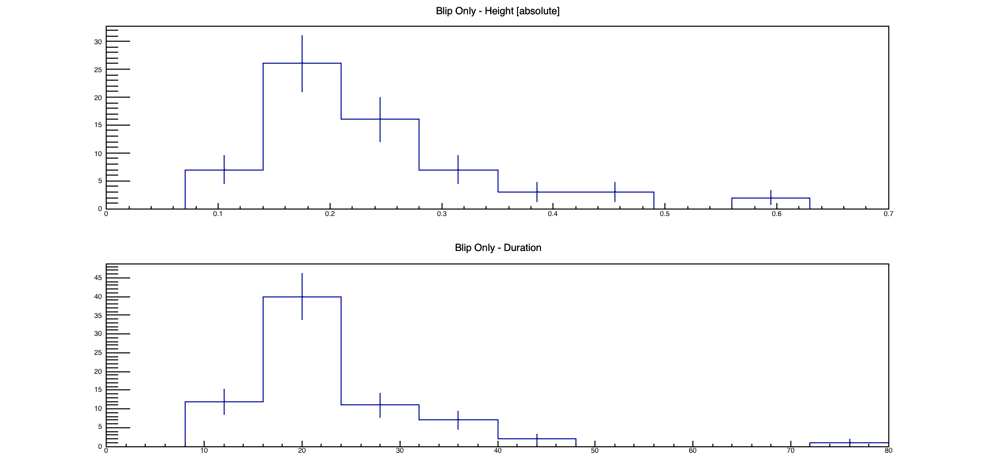

In [29]:
plotName = 'hHeightAndDurationStat'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h1 = ROOT.TH1D("h1","Blip Only - Height [absolute]",10,0,0.7)
h2 = ROOT.TH1D("h2","Blip Only - Duration",10,0,80)

for i in range(t[mainDisplay]):
    if DTblipType[mainDisplay][i] == "Blip" and PVblipType[mainDisplay][i] == "Blip":
        bType = 2
    elif DTblipType[mainDisplay][i] == "BaselineShift" and PVblipType[mainDisplay][i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    if bType == 2:
        h1.Fill(abs(peakob[mainDisplay][i]))
        h2.Fill(duration[mainDisplay][i])

c1.Divide(1,2)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")

c1.SaveAs(outDir+plotName+extension)
destruct(c1)
destruct(h1)
destruct(h2)
Plot(outDir+plotName+extension)

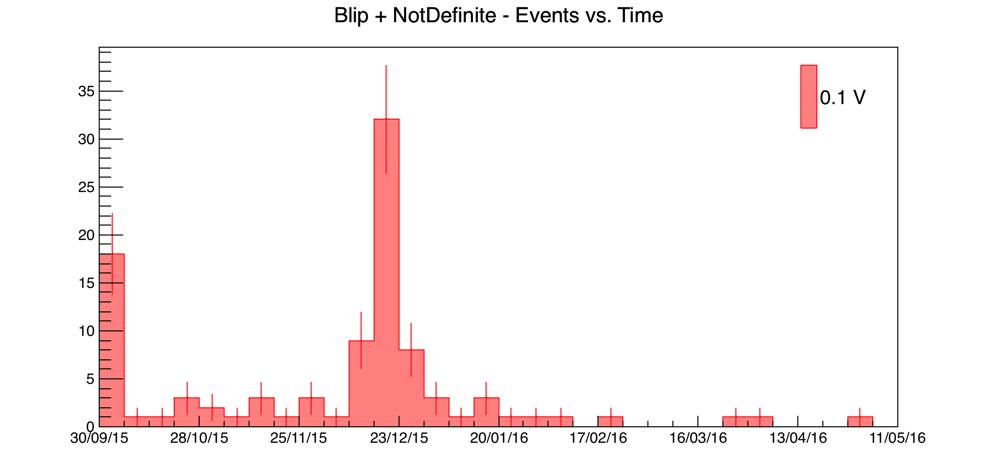

In [25]:
plotName = 'hThresholdComparison'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
h = [0]*nFiles
for i in range(nFiles):
    h[i] = ROOT.TH1D("h"+str(i),"Blip + NotDefinite - Events vs. Time",int(nDays/daysPerBin),startTime,endTime)
    h[i].GetXaxis().SetTimeDisplay(1)
    h[i].GetXaxis().SetNdivisions(timeDivisions,0)
    h[i].SetLineColor(i+2)
    h[i].SetFillColorAlpha(i+2,0.5)

for i in range(nFiles):
    for j in range(t[i]):
        if DTblipType[i][j] == "Blip" and PVblipType[i][j] == "Blip":
            bType = 2
        elif DTblipType[i][j] == "BaselineShift" and PVblipType[i][j] == "BaselineShift":
            bType = 1
        else:
            bType = 0
        if bType == 2 or bType == 0:
            h[i].Fill(int(time[i][j]))

h[nFiles-1].Draw("EH")
for i in reversed(range(nFiles-1)):
    h[i].Draw("EHSAME")

leg = ROOT.TLegend(0.8,0.7,0.89,0.89)
legEntry = ["0.1 V","0.08 V","0.06 V"]
for i in range(nFiles):
    leg.AddEntry(h[i],legEntry[i],"f")
leg.SetBorderSize(0)
leg.Draw()
    
c1.SaveAs(outDir+plotName+extension)
destruct(c1)
for i in range(nFiles):
    destruct(h[i])
Plot(outDir+plotName+extension)